# PyEumap - Temporal Gap-filling Demonstration

In this tutorial we will fill `nodata` gaps in a series of rasters, using a time-series median strategy provided in `pyeumap.gapfiller`.

First, let's download some data.

In [1]:
import sys

# Add the repository root in the path
# If the pyeumap isn't instaled you should do it   
sys.path.append('../../')

from pyeumap import datasets

datasets.TILES

['10636_switzerland',
 '14576_netherlands',
 '14580_netherlands',
 '15560_poland',
 '16057_ireland',
 '22497_sweden',
 '4582_spain',
 '5606_greece',
 '9326_italy',
 '9529_croatia']

We will use a LANDSAT raster time-series for Croatia.

In [2]:
tile = datasets.TILES[5]
datasets.get_data(tile+'_rasters.tar.gz')

Now, let's define the time-series intervals and connect them to the raster datasets.

In [3]:
from pathlib import Path
import os

data_root = datasets.DATA_ROOT_NAME
tile_dir = Path(os.getcwd()).joinpath(data_root, tile) # pyeumap.datasets.get_data() downloads to the current working directory by default

def get_landsat_images(season, band, perc):
    return sorted(tile_dir.glob(f'**/*landsat*{season}*{band}*{perc}*.tif'))

# we will use the 50th percentile of the LANDSAT NIR band provided in the eumap datasets
band = 'nir'
perc = 'p50'

# the eumap data is aggregated by season
seasons = [
    'winter',
    'spring',
    'summer',
    'fall',
]

fn_times_layers = {
    season: get_landsat_images(season, band, perc)
    for season in seasons
}

fn_times_layers['winter'][:5]

[PosixPath('/home/jupyter/leandro/Code/eumap/demo/python/eumap_data/22497_sweden/2000/landsat_ard_winter_nir_p50.tif'),
 PosixPath('/home/jupyter/leandro/Code/eumap/demo/python/eumap_data/22497_sweden/2001/landsat_ard_winter_nir_p50.tif'),
 PosixPath('/home/jupyter/leandro/Code/eumap/demo/python/eumap_data/22497_sweden/2002/landsat_ard_winter_nir_p50.tif'),
 PosixPath('/home/jupyter/leandro/Code/eumap/demo/python/eumap_data/22497_sweden/2003/landsat_ard_winter_nir_p50.tif'),
 PosixPath('/home/jupyter/leandro/Code/eumap/demo/python/eumap_data/22497_sweden/2004/landsat_ard_winter_nir_p50.tif')]

After we have defined our timeseries, we can fill the gaps using `pyeumap.gapfiller.TimeGapFiller`. The gap filler will build a `gapfilled` directory in the current working directory by default, and output the gap-filled rasters there.

In [4]:
from pyeumap import gapfiller

filler = gapfiller.TimeGapFiller(fn_times_layers, time_order=seasons, time_win_size=8)
filler.read_layers()
filler.run()
filler.save_to_img()

[15:30:18] Reading 21 layers on winter
[15:30:18] Reading 21 layers on spring
[15:30:18] Reading 20 layers on summer
[15:30:18] Reading 20 layers on fall
[15:30:19] Data shape: (1000, 1000, 21)
[15:30:19] Data shape: (1000, 1000, 21)
[15:30:19] Data shape: (1000, 1000, 20)
[15:30:19] Data shape: (1000, 1000, 20)
[15:30:19] Reading process finished
[15:30:19] Calculating 106 gap filling possibilities
[15:30:19] Using cpu engine
[15:30:19] Possibilities calculated
[15:30:19] Filling the gaps
[15:30:22] Saving the results
[15:30:29] Saving proces finished


Finally, we can check the results of the gap-filling using the `pyeumap.plotter` module.

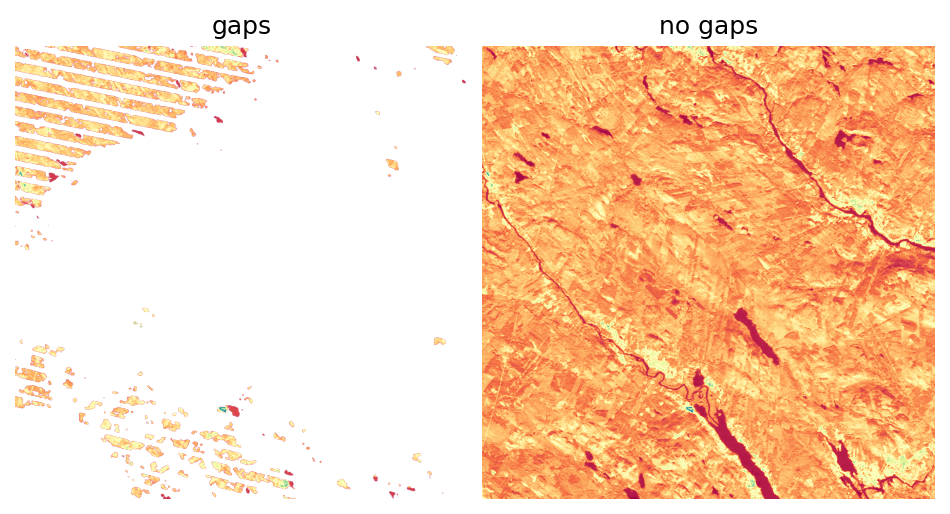

In [5]:
from pyeumap import plotter

image_with_gaps = fn_times_layers['fall'][12]
gapfilled_image = filler.time_data['fall'][:,:,12]

plotter.plot_rasters(
    image_with_gaps,
    gapfilled_image,
    cmaps='Spectral',
    figsize=8,
    titles=['gaps', 'no gaps'],
)

This approach enables us to apply spatial and spatiotemporal modeling and mapping even on datasets heavily burdened by cloud cover and other interference.